In [1]:
import pandas as pd 


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, fbeta_score, f1_score 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore')


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('cleaned_dataset.csv')
df

,heart_attack_disease,sex,age,race_ethn,bmi,overweight,diabetes,diagnose_strk,smoker,high_bp,high_chol,heavy_drinker,exercise,fruit,vege
0,0.0,1.0,70.0,0.0,15.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1,1.0,1.0,67.0,1.0,28.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,72.0,1.0,28.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,62.0,0.0,33.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,1.0,0.0,76.0,5.0,29.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381142,0.0,1.0,30.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
381143,0.0,0.0,80.0,5.0,28.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
381144,0.0,0.0,54.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
381145,0.0,0.0,67.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381147 entries, 0 to 381146
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   heart_attack_disease  381147 non-null  float64
 1   sex                   381147 non-null  float64
 2   age                   381147 non-null  float64
 3   race_ethn             381147 non-null  float64
 4   bmi                   381147 non-null  float64
 5   overweight            381147 non-null  float64
 6   diabetes              381147 non-null  float64
 7   diagnose_strk         381147 non-null  float64
 8   smoker                381147 non-null  float64
 9   high_bp               381147 non-null  float64
 10  high_chol             381147 non-null  float64
 11  heavy_drinker         381147 non-null  float64
 12  exercise              381147 non-null  float64
 13  fruit                 381147 non-null  float64
 14  vege                  381147 non-null  float64
dtype

In [4]:
df.shape

(381147, 15)

In [5]:
X = df.drop(['heart_attack_disease'], axis = 1)
y = df['heart_attack_disease']

In [6]:
print(X.shape, y.shape)

(381147, 14) (381147,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.3, 
                                                    random_state=42, 
                                                   stratify = y)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [8]:
print(X_train.shape, X_test.shape)

(266802, 14) (114345, 14)


In [9]:
#train_df = X_train.copy()
#train_df['heart_attack_disease'] = y_train
#train_df.head()

,sex,age,race_ethn,bmi,overweight,diabetes,diagnose_strk,smoker,high_bp,high_chol,heavy_drinker,exercise,fruit,vege,heart_attack_disease
310885,0.0,48.0,0.0,26.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
101653,0.0,38.0,0.0,22.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
237249,1.0,62.0,0.0,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
363045,1.0,64.0,0.0,22.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
228191,1.0,55.0,4.0,30.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [11]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_s)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['no disease', 'disease'],
           yticklabels=['no disease', 'disease']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

KNN 

In [12]:
#knn 
knn =  KNeighborsClassifier()
knn.fit(X_train_s, y_train)
knn_pred = knn.predict(X_test_s)



# need to print out metric scores for accuracy, precision, recall, F1 
knn_acc = knn.score(X_test_s, y_test)
knn_precision= precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

print(f'KNN Baseline- Accuracy: {knn_acc:.6f}')
print(f'KNN Baseline- Precision: {knn_precision:.6f}')
print(f'KNN Baseline- Recall : {knn_recall:.6f}')
print(f'KNN Baseline- F1 : {knn_f1:.6f}')
    

KNN Baseline- Accuracy: 0.900783
KNN Baseline- Precision: 0.313680
KNN Baseline- Recall : 0.107335
KNN Baseline- F1 : 0.159941


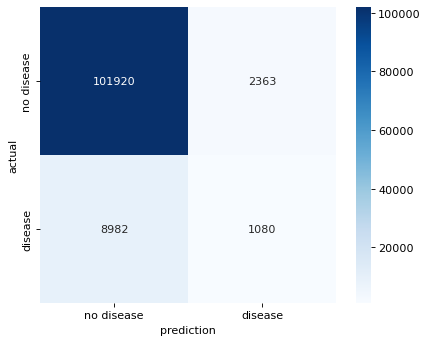

In [13]:
make_confusion_matrix(knn)

In [14]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    104283
         1.0       0.31      0.11      0.16     10062

    accuracy                           0.90    114345
   macro avg       0.62      0.54      0.55    114345
weighted avg       0.87      0.90      0.88    114345



Logistic Regression 

In [15]:
#logistic regression 
#set to no regularization
lr =  LogisticRegression(C=1000)
lr.fit(X_train_s, y_train)
lr_pred = lr.predict(X_test_s)



# need to print out metric scores for accuracy, precision, recall, F1 
lr_acc = lr.score(X_test_s, y_test)
lr_precision= precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

print(f'Logistic Baseline- Accuracy: {lr_acc:.6f}')
print(f'Logistic Baseline- Precision: {lr_precision:.6f}')
print(f'Logistic Baseline- Recall : {lr_recall:.6f}')
print(f'Logistic Baseline- F1 : {lr_f1:.6f}')
    

Logistic Baseline- Accuracy: 0.912003
Logistic Baseline- Precision: 0.500000
Logistic Baseline- Recall : 0.051978
Logistic Baseline- F1 : 0.094166


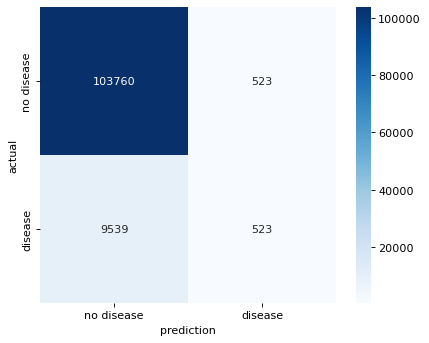

In [16]:
make_confusion_matrix(lr)

In [17]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95    104283
         1.0       0.50      0.05      0.09     10062

    accuracy                           0.91    114345
   macro avg       0.71      0.52      0.52    114345
weighted avg       0.88      0.91      0.88    114345



Decision Tree 

In [18]:
dtr =  DecisionTreeClassifier()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)



# need to print out metric scores for accuracy, precision, recall, F1 
dtr_acc = knn.score(X_test, y_test)
dtr_precision= precision_score(y_test, dtr_pred)
dtr_recall = recall_score(y_test, dtr_pred)
dtr_f1 = f1_score(y_test, dtr_pred)

print(f'Decision Tree Baseline- Accuracy: {dtr_acc:.6f}')
print(f'Decision Tree Baseline- Precision: {dtr_precision:.6f}')
print(f'Decision Tree Baseline- Recall : {dtr_recall:.6f}')
print(f'Decision Tree Baseline- F1 : {dtr_f1:.6f}')
    

Decision Tree Baseline- Accuracy: 0.912003
Decision Tree Baseline- Precision: 0.219017
Decision Tree Baseline- Recall : 0.162989
Decision Tree Baseline- F1 : 0.186895


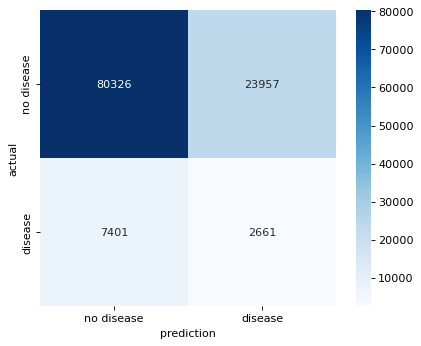

In [19]:
make_confusion_matrix(dtr)

In [20]:
print(classification_report(y_test, dtr_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93    104283
         1.0       0.22      0.16      0.19     10062

    accuracy                           0.88    114345
   macro avg       0.57      0.55      0.56    114345
weighted avg       0.86      0.88      0.87    114345



Random Forest 

In [21]:
rtr =  RandomForestClassifier()
rtr.fit(X_train, y_train)
rtr_pred = rtr.predict(X_test)



# need to print out metric scores for accuracy, precision, recall, F1 
rtr_acc = knn.score(X_test, y_test)
rtr_precision= precision_score(y_test, rtr_pred)
rtr_recall = recall_score(y_test, rtr_pred)
rtr_f1 = f1_score(y_test, rtr_pred)

print(f'Random Forest Baseline- Accuracy: {rtr_acc:.6f}')
print(f'Random Forest Baseline- Precision: {rtr_precision:.6f}')
print(f'Random Forest Baseline- Recall : {rtr_recall:.6f}')
print(f'Randome Forest Baseline- F1 : {rtr_f1:.6f}')

Random Forest Baseline- Accuracy: 0.912003
Random Forest Baseline- Precision: 0.262494
Random Forest Baseline- Recall : 0.115882
Randome Forest Baseline- F1 : 0.160783


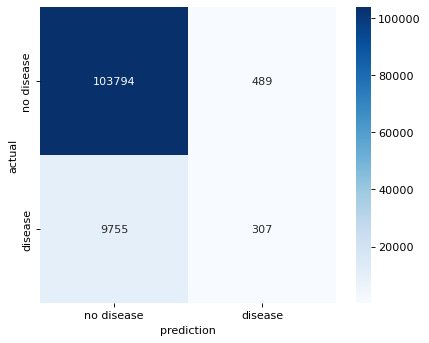

In [22]:
make_confusion_matrix(rtr)

In [23]:
print(classification_report(y_test, rtr_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94    104283
         1.0       0.26      0.12      0.16     10062

    accuracy                           0.89    114345
   macro avg       0.59      0.54      0.55    114345
weighted avg       0.86      0.89      0.87    114345



XGBoost 

In [28]:
xgb =  XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)



# need to print out metric scores for accuracy, precision, recall, F1 
xgb_acc = xgb.score(X_test, y_test)
xgb_precision= precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

print(f'XGBoost Baseline- Accuracy: {xgb_acc:.6f}')
print(f'XGBoost Baseline- Precision: {xgb_precision:.6f}')
print(f'XGBoost Baseline- Recall : {xgb_recall:.6f}')
print(f'XGBoost Baseline- F1 : {xgb_f1:.6f}')

XGBoost Baseline- Accuracy: 0.912300
XGBoost Baseline- Precision: 0.527157
XGBoost Baseline- Recall : 0.032797
XGBoost Baseline- F1 : 0.061751


ROC Curve

''

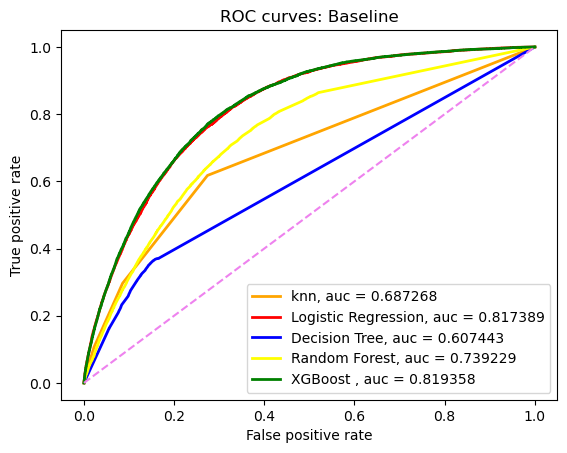

In [25]:
#knn
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test_s)[:,1])
roc_auc_knn = auc(knn_fpr,knn_tpr)

#logistic 
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr.predict_proba(X_test_s)[:,1])
roc_auc_lr = auc(lr_fpr,lr_tpr)

#Decision Tree  
dtr_fpr, dtr_tpr, dtr_thresholds = roc_curve(y_test, dtr.predict_proba(X_test)[:,1])
roc_auc_dtr = auc(dtr_fpr,dtr_tpr)

#Random Forest 
rtr_fpr, rtr_tpr, rtr_thresholds = roc_curve(y_test, rtr.predict_proba(X_test)[:,1])
roc_auc_rtr = auc(rtr_fpr,rtr_tpr)

#XGBoost 
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(xgb_fpr,xgb_tpr)

plt.plot(knn_fpr, knn_tpr, c = 'orange', lw=2, label = f'knn, auc = {roc_auc_knn:.6f}')
plt.plot(lr_fpr, lr_tpr, c = 'red', lw=2, label = f'Logistic Regression, auc = {roc_auc_lr:.6f}')
plt.plot(dtr_fpr, dtr_tpr, c = 'blue', lw=2, label = f'Decision Tree, auc = {roc_auc_dtr:.6f}')
plt.plot(rtr_fpr, rtr_tpr, c = 'yellow', lw=2, label = f'Random Forest, auc = {roc_auc_rtr:.6f}')
plt.plot(xgb_fpr, xgb_tpr, c = 'green', lw=2, label = f'XGBoost , auc = {roc_auc_xgb:.6f}')


plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc = 'lower right')
plt.title('ROC curves: Baseline')
plt.savefig('ROC_baseline.png', bbox_inches='tight')
;


In [27]:
acc = [knn_acc, lr_acc, dtr_acc, rtr_acc, xgb_acc]
precision = [knn_precision, lr_precision, dtr_precision, rtr_precision, xgb_precision]
recall = [knn_recall, lr_recall, dtr_recall, rtr_recall, xgb_recall]
f1 = [knn_f1, lr_f1, dtr_f1, rtr_f1, xgb_f1]
auc = [roc_auc_knn, roc_auc_lr, roc_auc_dtr, roc_auc_rtr, roc_auc_xgb]

index_labels = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
zipped = list(zip(acc, precision, recall, f1, auc))
baseline_scores_df = pd.DataFrame(zipped, columns = ['accuracy', 'precision', 'recall', 
                                         'f1', 'auc'], index = index_labels)

baseline_scores_df

,accuracy,precision,recall,f1,auc
KNN,0.900783,0.313680,0.107335,0.159941,0.687268
Logistic Regression,0.912003,0.500000,0.051978,0.094166,0.817389
Decision Tree,0.912003,0.219017,0.162989,0.186895,0.607443
Random Forest,0.912003,0.262494,0.115882,0.160783,0.739229
XGBoost,0.912003,0.527157,0.032797,0.061751,0.819358


In [ ]:
baseline_scores_df.to_csv('baseline_scores_df.csv')